## SKLearn Linear Regression

Including:
* Train Test Split
* Scaling
* Feature Generation
* Mean Squared Error
* Mean Absolute Error
* Prediction

No hyperparameters

In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import train_test_split, KFold

In [4]:
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx",)

In [5]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


### Goal: Develop a model to use given features to predict house prices

In [6]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [7]:
# Rename columns for convenience
df.columns = ['No', 'date','age','dist','stores','lat','long','price']

In [8]:
# Perform test/train split at 80/20 because we do not have much training data
df_train,df_test = train_test_split(df, test_size=0.2)

In [9]:
df_train

,No,date,age,dist,stores,lat,long,price
165,166,2012.916667,13.7,1236.5640,1,24.97694,121.55391,30.6
119,120,2013.500000,16.6,289.3248,5,24.98203,121.54348,59.6
179,180,2013.083333,14.0,438.8513,1,24.97493,121.52730,42.6
194,195,2013.500000,15.2,3771.8950,0,24.93363,121.51158,29.3
242,243,2012.833333,2.0,2077.3900,3,24.96357,121.51329,33.4
...,...,...,...,...,...,...,...,...
67,68,2013.500000,8.5,104.8101,5,24.96674,121.54067,56.8
343,344,2013.000000,33.5,563.2854,8,24.98223,121.53597,46.6
102,103,2013.083333,1.1,193.5845,6,24.96571,121.54089,54.4
212,213,2013.333333,17.6,1805.6650,2,24.98672,121.52091,31.1


In [11]:
features = ['date','age','dist','stores','lat','long']
target = 'price'

**Apply scaling**

Do before feature generation, b/c scaling would set our bias to zero - inconvenient!

In [29]:
scaler = MinMaxScaler()

In [30]:
# Fit the scaler with our features
Train_x = scaler.fit_transform(df_train[features])

**This cached our scaling values** - min x, max x, for all x

In [ ]:
# Apply the cached scaling to the test set 
#    Do not fit this!! Fitting is for training data. 
scaler.transform(df_test[features])

In [32]:
print('Min: ',scaler.data_min_)
print('Max: ',scaler.data_max_)

Min:  [2012.6666667    0.          23.38284      0.          24.93207
  121.47353  ]
Max:  [2013.5833333   43.8       6488.021       10.          25.00115
  121.56627  ]


**Generate features like:**
* $x_1^2, x_2^2, x_3^2...$
* $x_1x_2, x_1x_3, x_1x_4...$

Yes, this will turn into a lot of features!

In [24]:
# Generate features
#   degree sets max degree poly to be used
#   interaction_only would include just the x1x2 combinations
#   bias is the constant offset, think intercept
PF = PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)

In [33]:
# Fit the feature generator - will be a numpy array
#   note: using scaled values as input
Train_X_polied = PF.fit_transform(Train_x)

In [35]:
Train_X

array([[1.00000000e+00, 2.01291667e+03, 1.37000000e+01, ...,
        6.23847532e+02, 3.03604472e+03, 1.47753530e+04],
       [1.00000000e+00, 2.01350000e+03, 1.66000000e+01, ...,
        6.24101823e+02, 3.03640286e+03, 1.47728175e+04],
       [1.00000000e+00, 2.01308333e+03, 1.40000000e+01, ...,
        6.23747129e+02, 3.03513581e+03, 1.47688846e+04],
       ...,
       [1.00000000e+00, 2.01308333e+03, 1.10000000e+00, ...,
        6.23286676e+02, 3.03435461e+03, 1.47721879e+04],
       [1.00000000e+00, 2.01333333e+03, 1.76000000e+01, ...,
        6.24336176e+02, 3.03640895e+03, 1.47673316e+04],
       [1.00000000e+00, 2.01350000e+03, 1.44000000e+01, ...,
        6.23685192e+02, 3.03504730e+03, 1.47694899e+04]])

In [28]:
# With bias values enabled, this first column will just be constant 1
#   try turning it off and see how it goes away
Train_X[:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

**Apply Linear Regression**

In [37]:
lr = LinearRegression(fit_intercept=False)

In [38]:
lr.fit(X = Train_X_polied, y = df_train[target])

LinearRegression(fit_intercept=False)

In [40]:
# training coefficients - these should be similar to each other,
#    indicating scaling was applied properly
lr.coef_

array([  11.41787392,   17.02448136,  -20.19526008,   46.3490074 ,
         55.1853971 ,   62.73813459,  -26.31928001,    3.06494583,
          0.47780861,  -17.92409726,  -12.06692869,   -0.19327042,
        -10.31692035,   35.08757799,    4.41623998,    6.64683103,
        -23.49607107,  -22.07244904,  -20.30612247,  -77.6937075 ,
       -131.71388214,   -9.07147491,    2.76182033,  -82.88993968,
          7.22864066,   36.9398459 ,  -32.76650158,   39.41830171])

**Training error evaluation**

Predict y-hat using training data

In [41]:
# Run prediction!
y_hat_training = lr.predict(Train_X_polied)

In [43]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


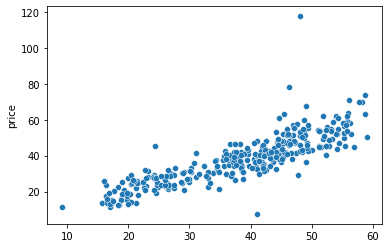

In [45]:
sns.scatterplot(y_hat_training, df_train[target])

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

**Calculate MSE**

$(y - \hat{y})^2$

In [47]:
mean_squared_error(y_hat_training, df_train[target])

53.32705917684365

**Calculate MAE**

$|y - \hat{y}|$

In [50]:
# this is more meaningful than the MSE since not squared
mean_absolute_error(y_hat_training, df_train[target])

4.903254302776984

In [51]:
df_train[target].mean()

38.02719033232632

In [55]:
# how closely did we fit
np.mean(abs(df_train[target] - y_hat_training / df_train[target] * 100))

66.37328711366402